# Towards Realistic and Trustworthy Super-Resolution for Multispectral Remote Sensing Images

<div align="center">
  <!-- Institution Logos -->
  <img src="https://web.gcompostela.org/wp-content/uploads/2019/02/University-of-Valencia.png" height="60" alt="University of Valencia">
  &nbsp;&nbsp;&nbsp;&nbsp;
  <img src="https://iadf-school.org/wp-content/uploads/2022/09/logo_iadfschool.png" height="60" alt="IADF School">
  &nbsp;&nbsp;&nbsp;&nbsp;
  <img src="https://isp.uv.es/images/IPL_logo_blanco.webp" height="60" alt="IPL">
  &nbsp;&nbsp;&nbsp;&nbsp;
  <img src="https://isp.uv.es/images/logo_isp.svg" height="60" alt="ISP">
  <br>

  <!-- Colab Badge -->
  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ipl-uv/iadfschool25tutorial/tutorial03.ipynb)
</div>


<p align="center">
  <img src="https://raw.githubusercontent.com/ESAOpenSR/opensr-test/main/docs/images/logo.png" width="25%">
</p>
<p align="center">
   <em>OpenSR-Test is a comprehensive benchmark for real-world Sentinel-2 imagery super-resolution</em> 🧪
</p>
<p align="center">
<a href='https://pypi.org/project/opensr-test/'>
    <img src='https://img.shields.io/pypi/v/opensr-test.svg' alt='PyPI' />
</a>
<a href="https://opensource.org/licenses/MIT" target="_blank">
    <img src="https://img.shields.io/badge/License-MIT-blue.svg" alt="License">
</a>
<a href="https://github.com/psf/black" target="_blank">
    <img src="https://img.shields.io/badge/code%20style-black-000000.svg" alt="Black">
</a>
<a href="https://github.com/ESAOpenSR/opensr-test" target="_blank">
    <img src="https://img.shields.io/badge/GitHub-ESAOpenSR-blue.svg" alt="GitHub">
</a>
</p>

---

## **Tutorial 3: Benchmarking and Evaluation**


Welcome to Tutorial 3! In this hands-on session, you'll learn how to rigorously evaluate super-resolution models using the OpenSR-Test framework. This tutorial focuses on comprehensive benchmarking techniques to assess the real-world performance of super-resolution algorithms on authentic satellite imagery.

**What You'll Learn**

- 🧪 Comprehensive Evaluation: Using OpenSR-Test datasets (NAIP, SPOT, Venμs, Spain) for rigorous model assessment

- 📏 Advanced Metrics: Computing consistency, synthesis, and correctness metrics beyond traditional PSNR/SSIM

- 🎯 Real-World Testing: Evaluating models on authentic satellite imagery with minimal spatial/spectral misalignment

- 📊 Interpretation: Understanding hallucination, omission, and improvement metrics for trustworthy assessment

- 🔍 Visualization: Creating comprehensive plots for model performance analysis

- 🏆 Comparative Analysis: Benchmarking multiple models and understanding their strengths/weaknesses

This tutorial demonstrates the complete evaluation workflow from loading benchmark datasets to interpreting results, ensuring your super-resolution models are trustworthy and perform well on real-world satellite imagery.

In [2]:
!pip install opensr-test[perceptual] --upgrade --quiet

### **Simple demo**

This basic example demonstrates how to use OpenSR-Test to evaluate any super-resolution model. We create synthetic tensors representing low-resolution input, high-resolution target, and super-resolved output images.

```
{
    'reflectance': 0.253,    # Reflectance consistency (lower = better)
    'spectral': 26.967,      # Spectral consistency in degrees (lower = better)  
    'spatial': 1.0,          # Spatial alignment (lower = better)
    'synthesis': 0.2870,     # High-frequency detail synthesis (higher = better)
    'ha_percent': 0.892,     # Hallucinations percentage (lower = better)
    'om_percent': 0.0613,    # Omissions percentage (lower = better)
    'im_percent': 0.04625    # Improvements percentage (higher = better)
}
```

In [10]:
import torch
import opensr_test
from pprint import pprint

# Create synthetic data for demonstration
lr = torch.rand(4, 64, 64)      # Low-resolution input (4 bands, 64x64)
hr = torch.rand(4, 256, 256)    # High-resolution target (4 bands, 256x256)
sr = torch.rand(4, 256, 256)    # Super-resolved output (4 bands, 256x256)

# Initialize metrics calculator
metrics = opensr_test.Metrics()

# Compute comprehensive evaluation
results = metrics.compute(lr=lr, sr=sr, hr=hr)
pprint(results)

{'ha_metric': 0.5203762650489807,
 'im_metric': 0.1513233631849289,
 'om_metric': 0.3283003568649292,
 'reflectance': 0.25302228331565857,
 'spatial': nan,
 'spectral': 26.83510971069336,
 'synthesis': 0.2872790992259979}


### **Load a Behcmark dataset**

OpenSR-Test provides **five carefully curated real-world datasets** for rigorous super-resolution evaluation. Each dataset contains authentic satellite imagery pairs with minimal spatial and spectral misalignment.

| Dataset | Command | Scale Factor | Images | HR Size | Focus Areas |
|---------|---------|--------------|--------|---------|-------------|
| NAIP | `opensr_test.load("naip")` | x4 | 62 | 484×484 | Crops, forests, bare soil |
| SPOT | `opensr_test.load("spot")` | x4 | 9 | 512×512 | Urban, crops, bare soil |
| Venμs | `opensr_test.load("venus")` | x2 | 59 | 256×256 | Mixed landscapes |
| Spain Crops | `opensr_test.load("spain_crops")` | x4 | 28 | 512×512 | Agricultural areas |
| Spain Urban | `opensr_test.load("spain_urban")` | x4 | 20 | 512×512 | Urban environments |

In [47]:
import opensr_test
import numpy as np

# Load the SPOT dataset (urban areas, crop fields, bare soil)
dataset = opensr_test.load("spain_urban")

# Explore the dataset structure
print("Dataset keys:", list(dataset.keys()))
print("LR data shape:", dataset["L2A"].shape)        # Sentinel-2 L2A data
print("HR data shape:", dataset["HRharm"].shape)     # High-resolution harmonized data
print("Metadata shape:", dataset["metadata"].shape)

# Access individual image pairs
lr_images = dataset["L2A"]      # Low-resolution Sentinel-2 (10 bands)
hr_images = dataset["HRharm"]   # High-resolution reference (RGB+NIR)
metadata = dataset["metadata"]  # Image metadata and filenames

print(f"\nDataset contains {len(lr_images)} image pairs")
print(f"LR bands: {lr_images.shape[1]} (all Sentinel-2 bands)")
print(f"HR bands: {hr_images.shape[1]} (typically RGB+NIR)")
print(f"Scale factor: {hr_images.shape[2] // lr_images.shape[2]}x")

Dataset keys: ['HR', 'HRharm', 'L1C', 'L2A', 'metadata']
LR data shape: (20, 12, 128, 128)
HR data shape: (20, 4, 512, 512)
Metadata shape: (20, 9)

Dataset contains 20 image pairs
LR bands: 12 (all Sentinel-2 bands)
HR bands: 4 (typically RGB+NIR)
Scale factor: 4x


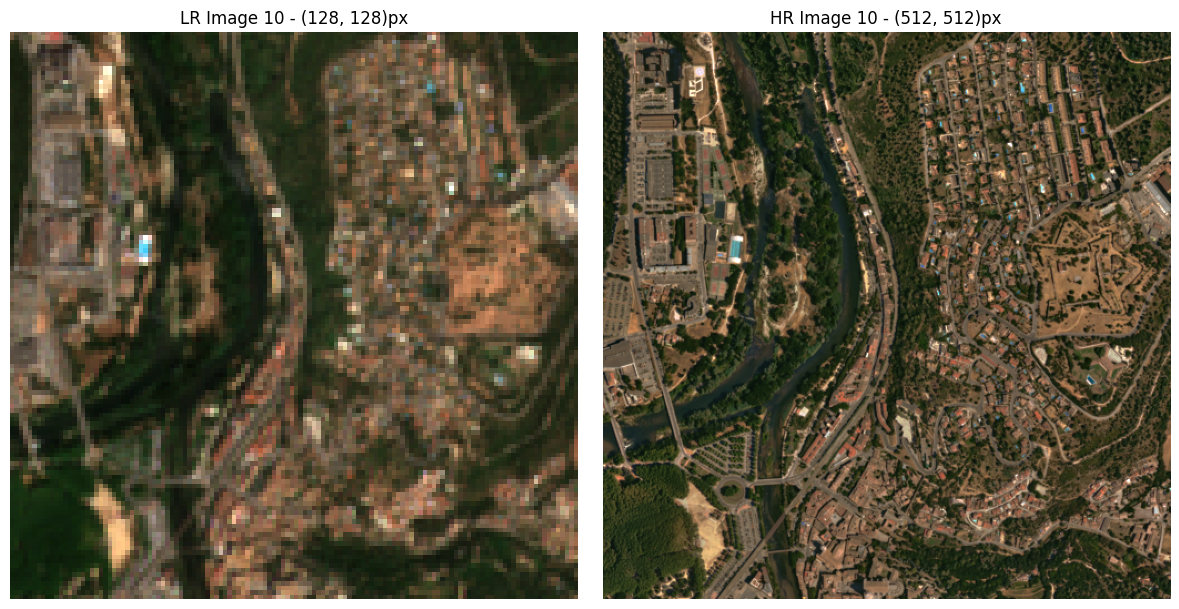

In [50]:
import matplotlib.pyplot as plt

# Simple visualization of one image pair
idx = 10
lr_rgb = lr_images[idx, [3, 2, 1]] / 10000  # RGB bands, normalized
hr_rgb = hr_images[idx, [0, 1, 2]] / 10000  # RGB bands, normalized

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(lr_rgb.transpose(1, 2, 0) * 3)  # Enhance brightness
axes[0].set_title(f"LR Image {idx} - {lr_rgb.shape[1:]}px")
axes[0].axis('off')

axes[1].imshow(hr_rgb.transpose(1, 2, 0) * 3)  # Enhance brightness
axes[1].set_title(f"HR Image {idx} - {hr_rgb.shape[1:]}px")
axes[1].axis('off')

plt.tight_layout()

### **Obtain the SR predictions in NAIP**

In [34]:
!pip install sen2sr mlstac --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.5 MB/s eta 0:00:00


In [54]:
import mlstac
import torch
import numpy as np
import opensr_test
from tqdm import tqdm

# Download and load the SEN2SR Lite model
mlstac.download(
  file="https://huggingface.co/tacofoundation/sen2sr/resolve/main/SEN2SRLite/NonReference_RGBN_x4/mlm.json",
  output_dir="model/SEN2SRLite_RGBN",
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = mlstac.load("model/SEN2SRLite_RGBN").compiled_model(device=device)
model = model.to(device)

# Load Spain Urban dataset
naip_dataset = opensr_test.load("spain_urban")
lr_images = naip_dataset["L2A"]      # Low-resolution Sentinel-2
hr_images = naip_dataset["HRharm"]   # High-resolution ground truth

print(f"Processing {len(lr_images)} NAIP images...")

# Process all images through SEN2SR model
sr_predictions = []

for idx in tqdm(range(len(lr_images)), desc="Generating SR predictions"):
    # Prepare input image
    lr_img = lr_images[idx] / 10000  # Normalize to [0,1] range
    lr_tensor = torch.from_numpy(lr_img).float().to(device)
    lr_tensor = torch.nan_to_num(lr_tensor, nan=0.0)

    # Generate super-resolution prediction
    with torch.no_grad():
        sr_pred = model(lr_tensor[None, [3, 2, 1, 8]]).squeeze(0)  # Add batch dim, then remove

    # Store prediction (keep on CPU to save GPU memory)
    sr_predictions.append(sr_pred.cpu().numpy())

# Convert to numpy array
sr_rgb = np.stack(sr_predictions)

print(f"SR predictions generated!")
print(f"LR shape: {lr_images.shape}")
print(f"HR shape: {hr_images.shape}")
print(f"SR shape: {sr_rgb.shape}")
print(f"Scale factor achieved: {sr_rgb.shape[2] // lr_images.shape[2]}x")

# Verify the enhancement
idx_sample = 0
print(f"\nSample image {idx_sample}:")
print(f"LR size: {lr_images[idx_sample].shape[1:]} pixels")
print(f"SR size: {sr_rgb[idx_sample].shape[1:]} pixels")
print(f"HR size: {hr_images[idx_sample].shape[1:]} pixels")

Processing 20 NAIP images...


Generating SR predictions: 100%|██████████| 20/20 [00:03<00:00,  5.75it/s]


SR predictions generated!
LR shape: (20, 12, 128, 128)
HR shape: (20, 4, 512, 512)
SR shape: (20, 4, 512, 512)
Scale factor achieved: 4x

Sample image 0:
LR size: (128, 128) pixels
SR size: (512, 512) pixels
HR size: (512, 512) pixels


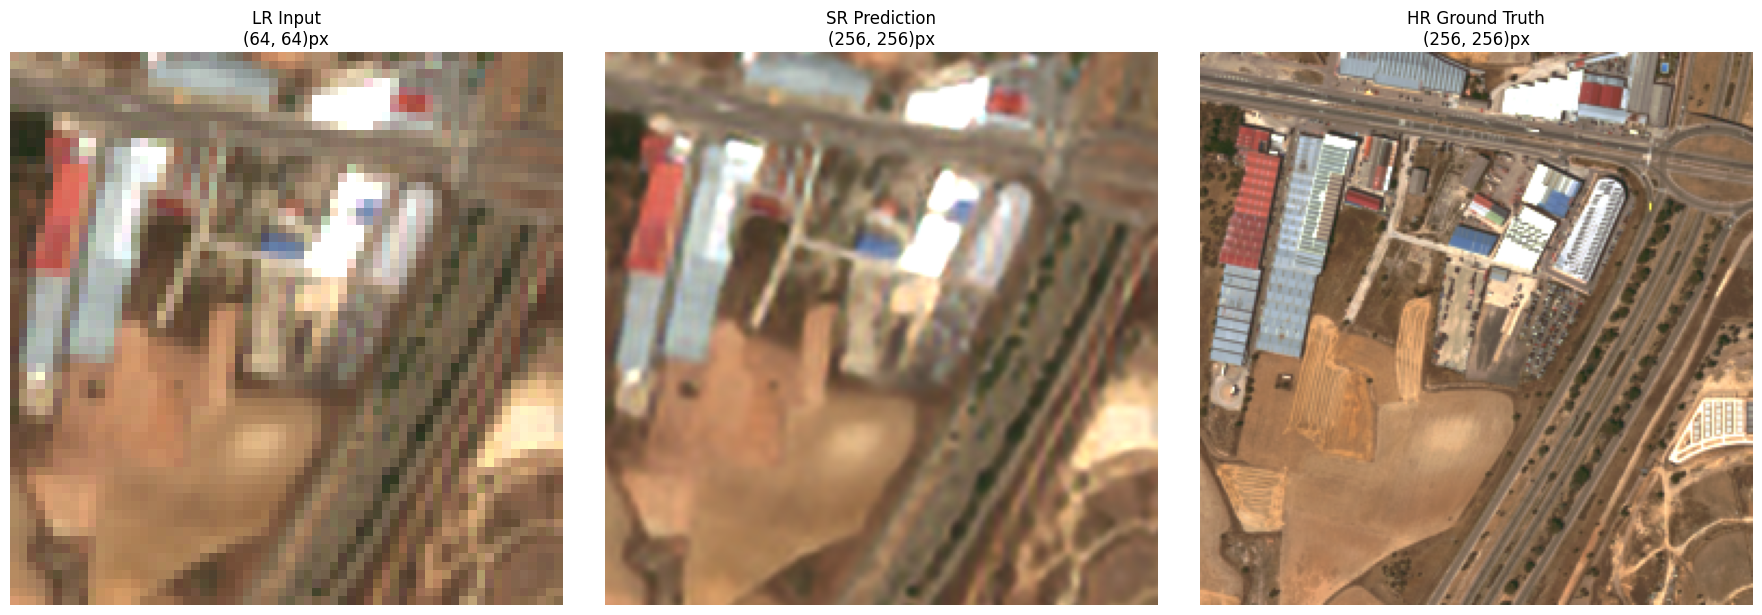

In [64]:
import matplotlib.pyplot as plt

# Visualize first prediction
idx = 6
lr_slice = slice(32, 96)
hr_slice = slice(lr_slice.start*4, lr_slice.stop*4)

lr_rgb_vis = lr_images[idx, [3, 2, 1], lr_slice, lr_slice] / 10000  # Sentinel-2 RGB bands
sr_rgb_vis = sr_rgb[idx, [0, 1, 2], hr_slice, hr_slice]             # SEN2SR RGB output
hr_rgb_vis = hr_images[idx, [0, 1, 2], hr_slice, hr_slice] / 10000  # Ground truth RGB

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(lr_rgb_vis.transpose(1, 2, 0) * 3)
axes[0].set_title(f"LR Input\n{lr_rgb_vis.shape[1:]}px")
axes[0].axis('off')

axes[1].imshow(np.clip(sr_rgb_vis.transpose(1, 2, 0), 0, 1) * 3)
axes[1].set_title(f"SR Prediction\n{sr_rgb_vis.shape[1:]}px")
axes[1].axis('off')

axes[2].imshow(hr_rgb_vis.transpose(1, 2, 0) * 3)
axes[2].set_title(f"HR Ground Truth\n{hr_rgb_vis.shape[1:]}px")
axes[2].axis('off')

plt.tight_layout()
plt.show()

### **Run stats display it**

Now we'll evaluate our SEN2SRLite predictions on the entire NAIP dataset using OpenSR-Test comprehensive metrics and display the statistical results.


In [84]:
import pandas as pd
from tqdm import tqdm

# Initialize metrics calculator
metrics_calculator = opensr_test.Metrics()

# Store results for all images
results_list = []

print("Evaluating SEN2SR predictions on NAIP dataset...")

# Process each image pair
for idx in tqdm(range(len(lr_images)), desc="Computing metrics"):
    # Prepare images (use RGB bands only for evaluation)
    lr_img = torch.from_numpy(lr_images[idx, [3, 2, 1]] / 10000).float()  # RGB from Sentinel-2
    sr_img = torch.from_numpy(sr_rgb[idx, [0, 1, 2]]).float()              # RGB from SEN2SR
    hr_img = torch.from_numpy(hr_images[idx, [0, 1, 2]] / 10000).float()   # RGB ground truth

    # Compute comprehensive metrics
    metrics_result = metrics_calculator.compute(lr=lr_img, sr=sr_img, hr=hr_img)

    # Add metadata
    metrics_result['image_idx'] = idx
    metrics_result['filename'] = metadata.iloc[idx]['hr_file']

    results_list.append(metrics_result)

# Convert to DataFrame for analysis
results_df = pd.DataFrame(results_list)

print("\n" + "="*60)
print("SEN2SRLite Performance on NAIP Dataset")
print("="*60)

# Display comprehensive statistics
print("\n📊 SUMMARY STATISTICS:")
print("-" * 40)

stats_summary = results_df[['reflectance', 'spectral', 'spatial', 'synthesis',
                           'ha_metric', 'om_metric', 'im_metric']].describe()

print(f"{'Metric':<15} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8}")
print("-" * 50)
for metric in stats_summary.columns:
    mean_val = stats_summary.loc['mean', metric]
    std_val = stats_summary.loc['std', metric]
    min_val = stats_summary.loc['min', metric]
    max_val = stats_summary.loc['max', metric]
    print(f"{metric:<15} {mean_val:<8.3f} {std_val:<8.3f} {min_val:<8.3f} {max_val:<8.3f}")

print(f"\nCorrectness Analysis:")
print(f"  Hallucinations: {results_df['ha_metric'].mean():.1f}% ± {results_df['ha_metric'].std():.1f}%")
print(f"  Omissions: {results_df['om_metric'].mean():.1f}% ± {results_df['om_metric'].std():.1f}%")
print(f"  Improvements: {results_df['im_metric'].mean():.1f}% ± {results_df['im_metric'].std():.1f}%")

Evaluating SEN2SR predictions on NAIP dataset...


Computing metrics: 100%|██████████| 20/20 [00:12<00:00,  1.67it/s]


SEN2SRLite Performance on NAIP Dataset

📊 SUMMARY STATISTICS:
----------------------------------------
Metric          Mean     Std      Min      Max     
--------------------------------------------------
reflectance     0.002    0.001    0.001    0.004   
spectral        0.788    0.293    0.373    1.353   
spatial         0.000    0.000    0.000    0.000   
synthesis       0.007    0.003    0.003    0.014   
ha_metric       0.082    0.034    0.038    0.159   
om_metric       0.791    0.088    0.633    0.894   
im_metric       0.127    0.058    0.064    0.253   

Correctness Analysis:
  Hallucinations: 0.1% ± 0.0%
  Omissions: 0.8% ± 0.1%
  Improvements: 0.1% ± 0.1%


Display the summary of the metrics. The plot shows:

- LR: Low Resolution image
- LRdown: Downsampled Low Resolution image using bilinear interpolation and triangular antialiasing filter.
- SR: Super-Resolved image.
- SRharm: Harmonized super-resolution image.
- HR: High Resolution image.
- Reflectance Consistency: Reflectance consistency between the LR and HR images.
- Spectral Consistency: Spectral consistency between the LR and HR images.
- Distance normalized to the Omissiom, Hallucination, and Improvement spaces.

(<Figure size 2000x1000 with 10 Axes>,
 array([[<Axes: title={'center': 'LR'}>,
         <Axes: title={'center': 'LRdown'}>,
         <Axes: title={'center': 'SR'}>,
         <Axes: title={'center': 'SRharm'}>,
         <Axes: title={'center': 'HR'}>],
        [<Axes: title={'center': '$\\bf{Reflectance\\ Consistency \\downarrow}$ \n Reflectance (l1): 0.0029'}>,
         <Axes: title={'center': '$\\bf{Spectral\\ Consistency \\downarrow}$ \n Spectral (sad): 0.6687'}>,
         <Axes: title={'center': '$\\bf{Distance\\ to\\ Omission\\ Space \\uparrow}$ \n Omission: 0.8080'}>,
         <Axes: title={'center': '$\\bf{Distance\\ to\\ Hallucination\\ Space \\uparrow}$ \n Hallucination: 0.0866'}>,
         <Axes: title={'center': '$\\bf{Distance\\ to\\ Improvement\\ Space \\downarrow}$ \n Improvement: 0.1054'}>]],
       dtype=object))

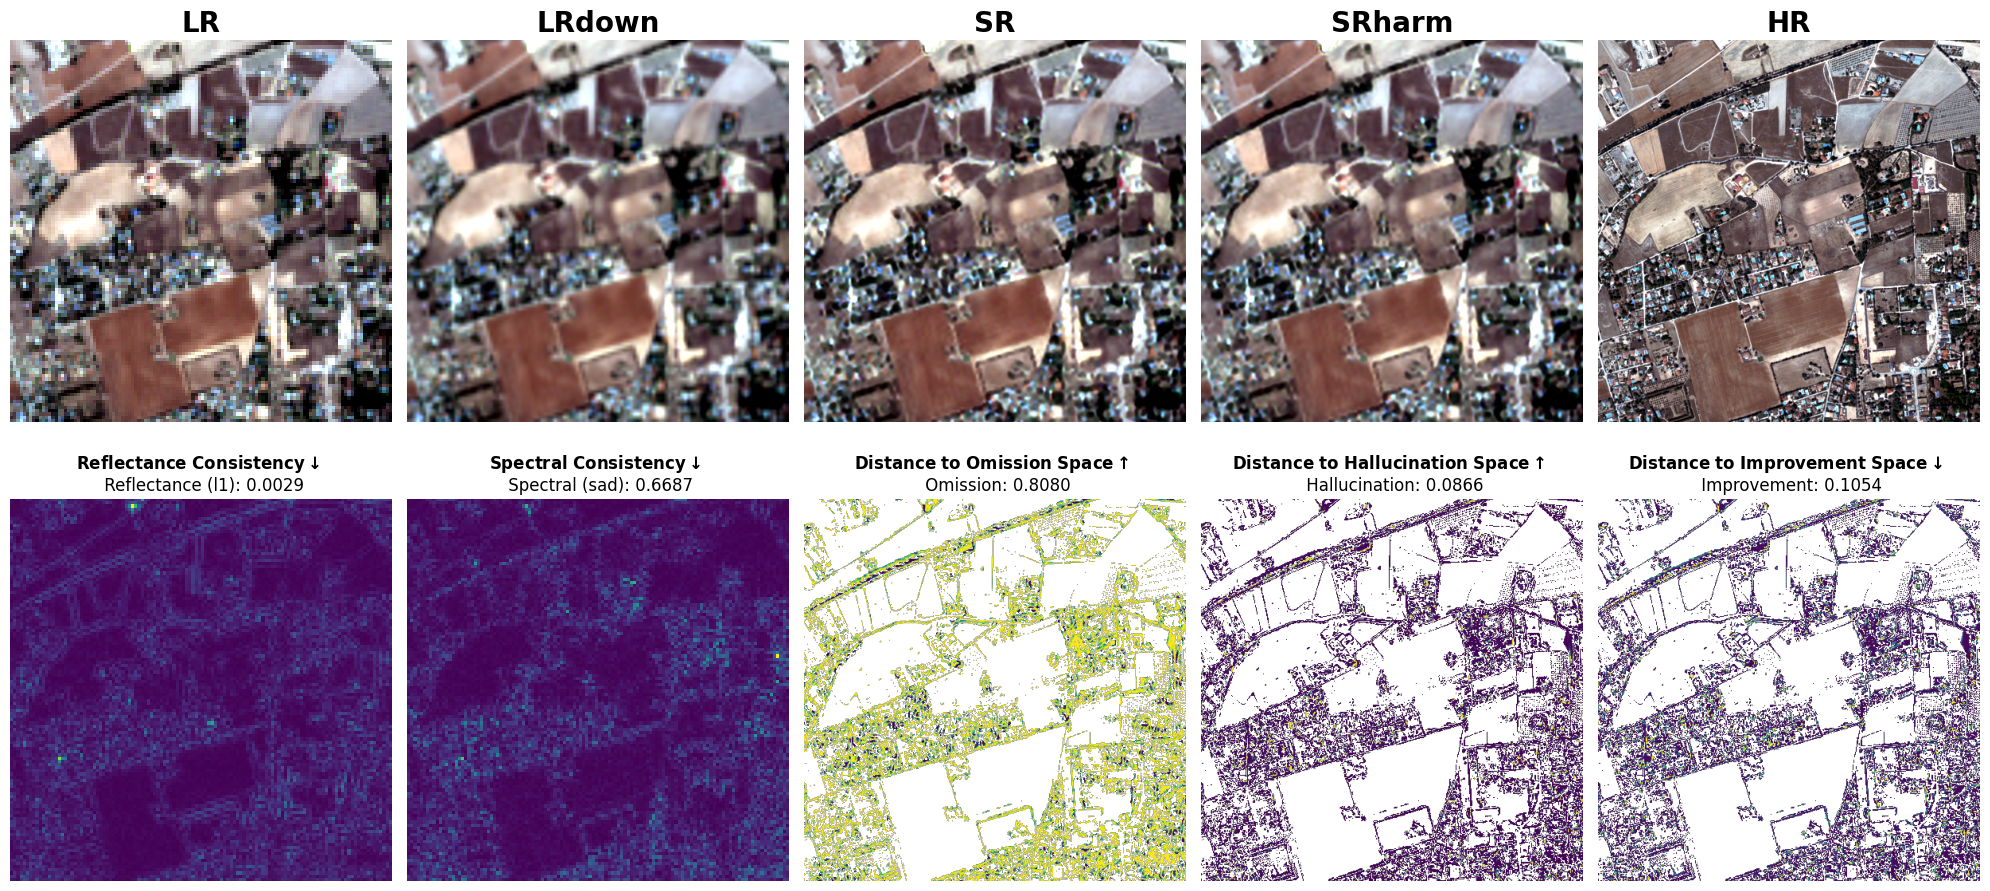

In [86]:
metrics_calculator.plot_summary()

Display a ternary plot of the metrics:

(<Figure size 640x480 with 1 Axes>,
 <TernaryAxes: tlabel='Im', llabel='Om', rlabel='Ha'>)

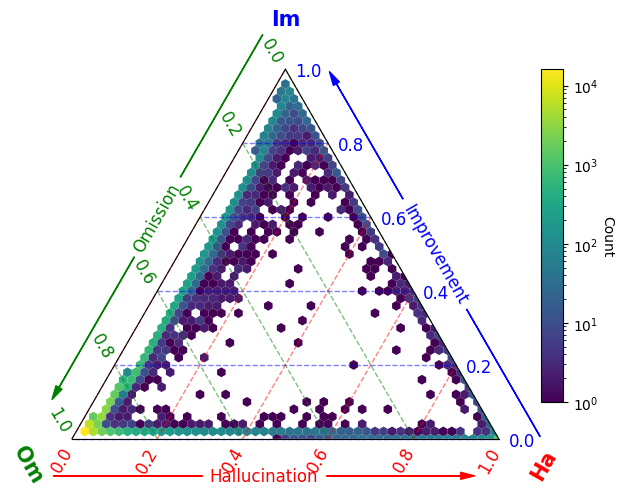

In [87]:
metrics_calculator.plot_ternary()

Display the correctness of the *SR* image. The blue color represents the pixels closer to the improvement space (*HR*), green pixels are closer to the omission space (*LR*), and red pixels are closer to the hallucination space (neither in *HR* nor *LR*). The distance *SR-LR* and *SR-HR* are normalized to the *LR-HR* distance that is independent of the SR model. Threfore a pixel or patch with a improvement distance (*dim*) of 3 means that the SR is further to the HR in 3 *LR-HR* units. The same applies to the omission distance.



(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: title={'center': 'SR RGB'}>,
        <Axes: title={'center': 'HR RGB'}>,
        <Axes: title={'center': 'TC score - GRID'}>,
        <Axes: title={'center': 'TC score - 2D'}, xlabel='$d_{om}$', ylabel='$d_{im}$'>],
       dtype=object))

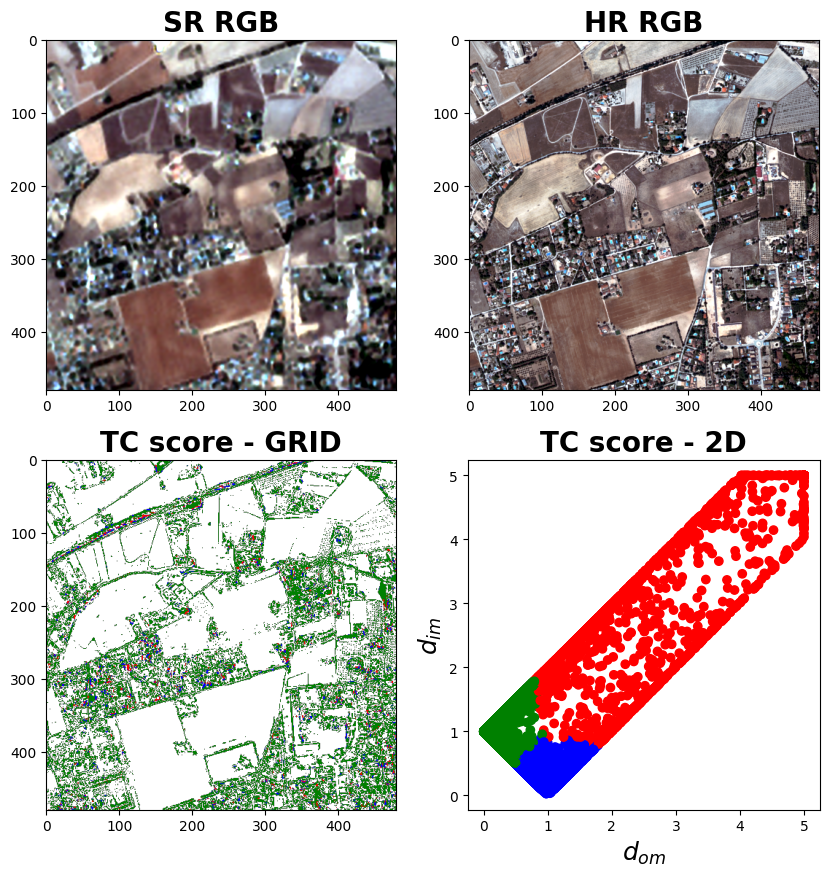

In [73]:
metrics_calculator.plot_tc()